In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
#Create the dataframe from de CSV file
df=pd.read_csv('pylidc_csv.csv')

In [3]:
#In this first section we present some information on the data

In [4]:
df.head(5)

,Unnamed: 0,Nod_id,Patient_id,slice thickness,N nods,Spiculation_Min,Spiculation_Med,Spiculation_Max,Internal_Structure,Calcification,...,Lobulation_max,Texture,Malignancy_min,Malignancy_mean,Malignancy_max,Malignancy_n4,Malignancy_n5,Subtlety_Min,Subtlety_Med,Subtlety_Max
0,1,LIDC-IDRI-0078-1,LIDC-IDRI-0078,3.0,4,1,2.25,4,1,6,...,4,5,3,3.75,5,1,1,4.0,4.50,5.0
1,2,LIDC-IDRI-0078-2,LIDC-IDRI-0078,3.0,4,1,2.25,4,1,6,...,4,4,3,3.75,5,1,1,4.0,4.75,5.0
2,3,LIDC-IDRI-0078-3,LIDC-IDRI-0078,3.0,4,1,1.00,1,1,5,...,1,5,1,1.00,1,0,0,4.0,4.00,4.0
3,4,LIDC-IDRI-0078-4,LIDC-IDRI-0078,3.0,4,1,2.75,4,1,4,...,4,5,3,4.25,5,1,2,5.0,5.00,5.0
4,5,LIDC-IDRI-0069-1,LIDC-IDRI-0069,2.0,3,1,4.00,5,1,6,...,5,5,2,3.25,5,0,1,2.0,2.50,3.0


In [5]:
#The number of nods for each patient is distrubuted according to the following frequency table 
sum=0
print("Number of nods ", "Relative frequency")
for j in range(1,10):
    sum+=df['N nods'].value_counts()[j]/len(df)
    print("       ",j, "         " ,(df['N nods'].value_counts()[j]/len(df)).round(2))
print("   Total:          ",sum.round(2))

Number of nods  Relative frequency
        1           0.11
        2           0.16
        3           0.14
        4           0.11
        5           0.09
        6           0.09
        7           0.06
        8           0.07
        9           0.03
   Total:           0.87


In [6]:
print('Number of patients')
print(df["Patient_id"].nunique())

Number of patients
875


In [7]:
#To better understand the way to classify a nod to be malignant or not we present the related variables 

AxesSubplot(0.125,0.125;0.775x0.755)


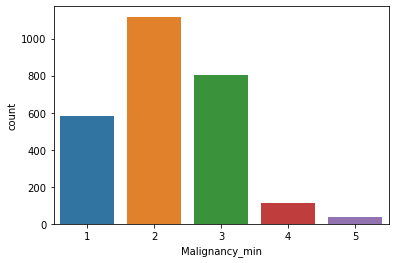

In [8]:
print(sns.countplot(x='Malignancy_min',data=df))

AxesSubplot(0.125,0.125;0.775x0.755)


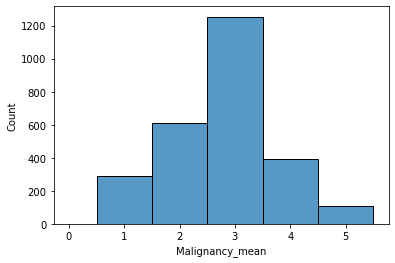

In [9]:
print(sns.histplot(x='Malignancy_mean',data=df,bins=[0,0.5,1.5,2.5,3.5,4.5,5.5]))

AxesSubplot(0.125,0.125;0.775x0.755)


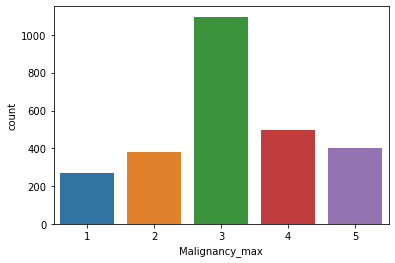

In [10]:
print(sns.countplot(x='Malignancy_max',data=df))

AxesSubplot(0.125,0.125;0.775x0.755)


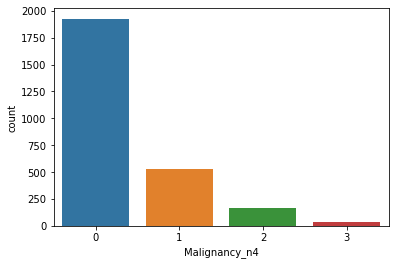

In [11]:
print(sns.countplot(x='Malignancy_n4',data=df))

AxesSubplot(0.125,0.125;0.775x0.755)


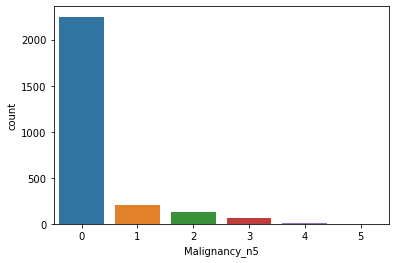

In [12]:
print(sns.countplot(x='Malignancy_n5',data=df))

In [13]:
#Noticing that the distribution of the mean value and the max value is similar we explored it a litle further 
df['dif']=df['Malignancy_max']-df['Malignancy_mean']

AxesSubplot(0.125,0.125;0.775x0.755)


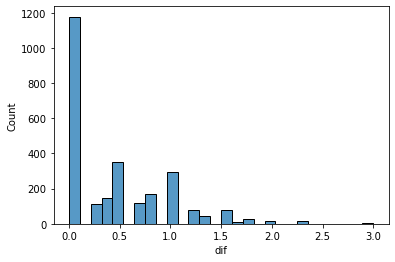

In [14]:
print(sns.histplot(x='dif',data=df))

In [15]:
# Despite the similarities between the mean and the max value we decided to create a joint criterion for the 
# malignancy classification. Therefore a node is considered malignant if there is at least one classification of 5 or
# if the mean value over the classifications is at least 3.5

df["Malignancy"]=np.where((df['Malignancy_mean']>= 3.5)|(df['Malignancy_max']==5), True, False)

In [16]:
df[{'Malignancy_mean','Malignancy_max','Malignancy'}].head(5)

,Malignancy_max,Malignancy,Malignancy_mean
0,5,True,3.75
1,5,True,3.75
2,1,False,1.00
3,5,True,4.25
4,5,True,3.25


In [17]:
# Identify the features used to predict the classification of the malignancy of the node
# X - vector of valiables used to predict
# y - target variable

X=df[['N nods','Spiculation_Min', 'Spiculation_Med', 'Spiculation_Max',
       'Internal_Structure', 'Calcification', 'Sphericity', 'Margin_min',
       'Margin_mean', 'Margin_max', 'Lobulation_min', 'Lobulation_mean',
       'Lobulation_max', 'Texture']]
y=df['Malignancy']

In [18]:
# Devide the dataset in train (80%) and test (20%) subsets
# Define a random state do fix this division

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [19]:
# Construction of a decision tree classifier with the stop criterion of 
# at least 0.001 of minimum impurity decrease to avoind overfitting

dt = tree.DecisionTreeClassifier(min_impurity_decrease=0.001)
dt = dt.fit(X_train, y_train)

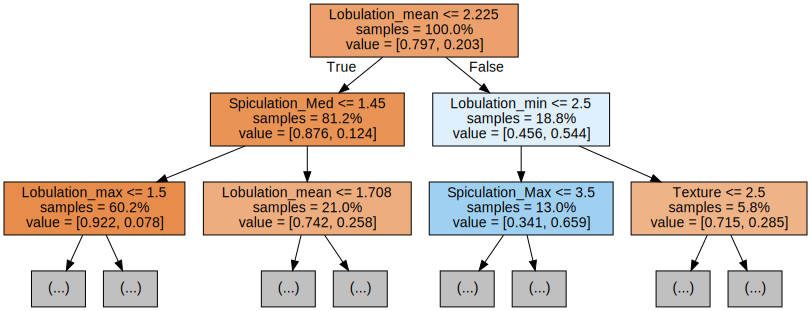

In [20]:
# print of the more significant separations with percentage of the subset (train) and proportion for each separation

dt_data = export_graphviz(dt,feature_names=X_train.columns,filled=True,max_depth=2,impurity=False,proportion=True)
graph = graphviz.Source(dt_data)
display(graph)

In [21]:
# test of the decision tree obtained using the test subset
y_predict=dt.predict(X_test)

print("Confusion Matrix:")
confusion_matrix(y_test, y_predict)

Confusion Matrix:


array([[390,  18],
       [ 78,  45]])

In [22]:
print("Accuracy:")
accuracy_score(y_test, y_predict)

Accuracy:


0.8192090395480226

In [23]:
# Random Forest construction with trees similar to the ones obtained previously
# for different values of hyperparameter - number of features (max_features) 

rf = RandomForestClassifier(max_features=1,min_impurity_decrease=0.001)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
#print("Number of featrures: ", 1 ," Accuracy: ", accuracy)
best=1
best_ac=accuracy
x_rf=[1]
y_rf=[accuracy]
    
for i in range(2,10):
    rf = RandomForestClassifier(max_features=i,min_impurity_decrease=0.001,n_estimators=100)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    #print("Number of featrures: ", i ," Accuracy: ", accuracy)
    x_rf.append(i)
    y_rf.append(accuracy)
    if(accuracy>best_ac):
        best=i
        best_ac=accuracy

#print("Number of featrures: ", best ," Accuracy: ", best_ac)

Best number of features:  8  with accuracy= 0.8549905838041432


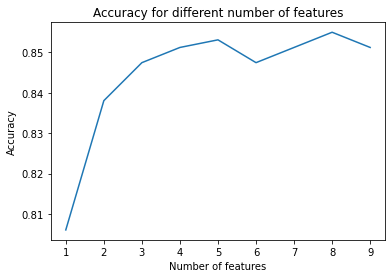

In [24]:
# Evaluate the hyperparameter and identify the best value for the accuracy

s = pd.Series(y_rf,x_rf)
plt.title('Accuracy for different number of features')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')

s.plot.line()  
print("Best number of features: ", best ," with accuracy=", best_ac)

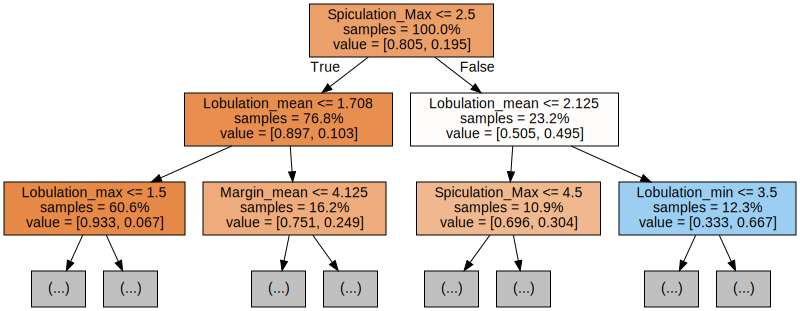

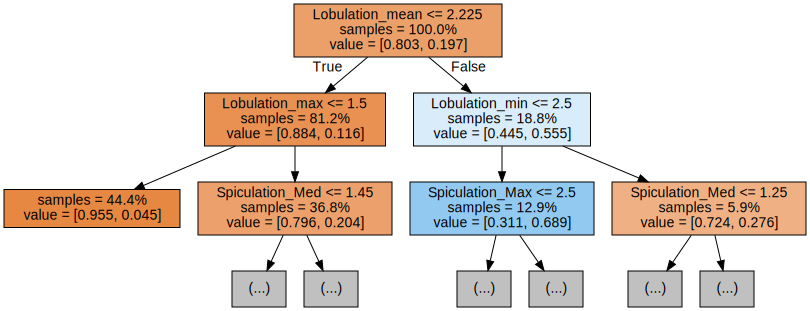

In [25]:
# print of the more significant separations with percentage of the subset (train) and proportion for each separation
# for the two first trees

rf = RandomForestClassifier(max_features=best,min_impurity_decrease=0.001)
rf.fit(X_train, y_train)

for i in range(2):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,feature_names=X_train.columns,filled=True,max_depth=2,impurity=False,proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [26]:
#KNN

In [27]:
# Knn construction for different values of hyperparameter - number of neighbors (n_neighbors) 


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
#print("Number of neighbors: ","1", "Accuracy: ", accuracy)
best=1
best_ac=accuracy
x_knn=[1]
y_knn=[accuracy]

for i in range(2,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    #print("Number of neighbors: ",i, "Accuracy: ", accuracy)
    x_knn.append(i)
    y_knn.append(accuracy)
    if(accuracy>best_ac):
        best=i
        best_ac=accuracy

Best number of neighbors:  8  with accuracy= 0.8418079096045198


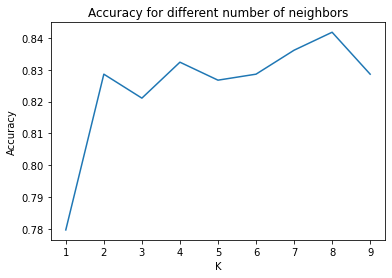

In [28]:
# Evaluate the hyperparameter and identify the best value for the accuracy

s = pd.Series(y_knn,x_knn)
plt.title('Accuracy for different number of neighbors')
plt.xlabel('K')
plt.ylabel('Accuracy')

s.plot.line()  
print("Best number of neighbors: ", best ," with accuracy=", best_ac)